In [1]:
from google.colab import drive # untuk menghubungkan ke dalam drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
base_dir = '/content/drive/MyDrive/Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [3]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [4]:
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [5]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (100, 150, 150, 3)
Train Label =  (100,)
Validation Data =  (20, 150, 150, 3)
Validation Label =  (20,)


In [6]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [108 114 121]
Data setelah di-normalisasi  [0.42352942 0.44705883 0.4745098 ]


In [7]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:11])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[1:11])

Label sebelum di-encoder  ['daun_seledri' 'daun_seledri' 'daun_seledri' 'daun_seledri'
 'daun_seledri' 'daun_seledri' 'daun_seledri' 'daun_seledri'
 'daun_seledri' 'daun_seledri']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [9]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [10]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
H = model.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
5/5 [==============================] - 3s 492ms/step - loss: 1.0892 - acc: 0.5700 - val_loss: 0.7349 - val_acc: 0.5000
Epoch 2/10
5/5 [==============================] - 2s 450ms/step - loss: 0.6787 - acc: 0.6600 - val_loss: 0.6442 - val_acc: 0.6000
Epoch 3/10
5/5 [==============================] - 2s 435ms/step - loss: 0.6341 - acc: 0.6000 - val_loss: 0.5751 - val_acc: 0.9500
Epoch 4/10
5/5 [==============================] - 2s 442ms/step - loss: 0.5013 - acc: 0.9300 - val_loss: 0.3773 - val_acc: 0.9000
Epoch 5/10
5/5 [==============================] - 2s 447ms/step - loss: 0.2494 - acc: 0.9200 - val_loss: 0.1765 - val_acc: 0.9000
Epoch 6/10
5/5 [==============================] - 2s 453ms/step - loss: 0.1125 - acc: 0.9600 - val_loss: 0.1559 - val_acc: 0.9500
Epoch 7/10
5/5 [==============================] - 2s 441ms/step - loss: 0.0835 - acc: 0.9500 - val_loss: 0.1022 - val_acc: 0.9500
Epoch 8/10
5/5 [==============================] - 2s 449ms/step - loss: 0.0638 - acc: 0.97

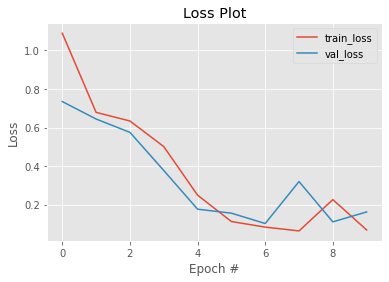

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

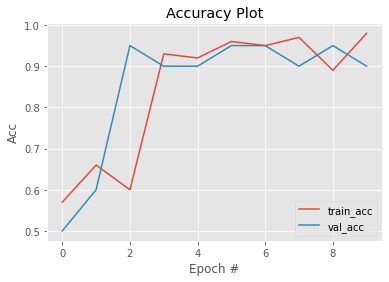

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

